In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movielens_500k.csv')
df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
499994,3445,8019,3.5,1454265447
499995,3445,8042,4.0,1452883966
499996,3445,8154,4.0,1487631358
499997,3445,8188,4.0,1464211151


In [3]:
df.userId.nunique(), df.movieId.nunique()

(3445, 17466)

In [4]:
df.rating.value_counts()

4.0    134700
3.0     97143
5.0     74244
3.5     62535
4.5     43600
2.0     32295
2.5     24986
1.0     14443
1.5      8484
0.5      7569
Name: rating, dtype: int64

In [5]:
data = df.drop('timestamp', axis=1)
data

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
499994,3445,8019,3.5
499995,3445,8042,4.0
499996,3445,8154,4.0
499997,3445,8188,4.0


In [6]:
x = data.drop('rating', axis=1)
y = data['rating']
x, y

(        userId  movieId
 0            1      296
 1            1      306
 2            1      307
 3            1      665
 4            1      899
 ...        ...      ...
 499994    3445     8019
 499995    3445     8042
 499996    3445     8154
 499997    3445     8188
 499998    3445     8260
 
 [499999 rows x 2 columns],
 0         5.0
 1         3.5
 2         5.0
 3         5.0
 4         3.5
          ... 
 499994    3.5
 499995    4.0
 499996    4.0
 499997    4.0
 499998    3.5
 Name: rating, Length: 499999, dtype: float64)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x_train), len(x_test)

(399999, 100000)

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['userId', 'movieId'])
)

ct.fit(x_train)
x_train_normalized = ct.transform(x_train)
x_test_normalized = ct.transform(x_test)

x_train_normalized, x_test_normalized

(array([[5.48199768e-01, 8.53363199e-03],
        [9.99419280e-01, 3.30016560e-01],
        [1.86411150e-01, 1.67035197e-03],
        ...,
        [2.72357724e-01, 1.48369373e-04],
        [3.00522648e-01, 6.55218294e-03],
        [2.53193961e-01, 5.59974729e-03]]),
 array([[0.23054588, 0.0015172 ],
        [0.40882695, 0.01474122],
        [0.28803717, 0.01711991],
        ...,
        [0.31184669, 0.02334185],
        [0.11788618, 0.00698772],
        [0.49390244, 0.00543223]]))

In [9]:
import tensorflow as tf
from gc import callbacks


early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.optimizers.SGD(),
    metrics=['mae']
)

history = model.fit(x_train_normalized, y_train, epochs=100, callbacks=[early_stop])

Epoch 1/100
12500/12500 [==============================] - 11s 881us/step - loss: 0.8458 - mae: 0.8458
Epoch 2/100
12500/12500 [==============================] - 11s 844us/step - loss: 0.8347 - mae: 0.8347
Epoch 3/100
12500/12500 [==============================] - 12s 955us/step - loss: 0.8348 - mae: 0.8348
Epoch 4/100
12500/12500 [==============================] - 13s 1ms/step - loss: 0.8349 - mae: 0.8349
Epoch 5/100
12500/12500 [==============================] - 11s 915us/step - loss: 0.8349 - mae: 0.8349


In [10]:
model.evaluate(x_test_normalized, y_test)

3125/3125 [==============================] - 3s 835us/step - loss: 0.8338 - mae: 0.8338


[0.8337690830230713, 0.8337690830230713]

Text(0, 0.5, 'loss')

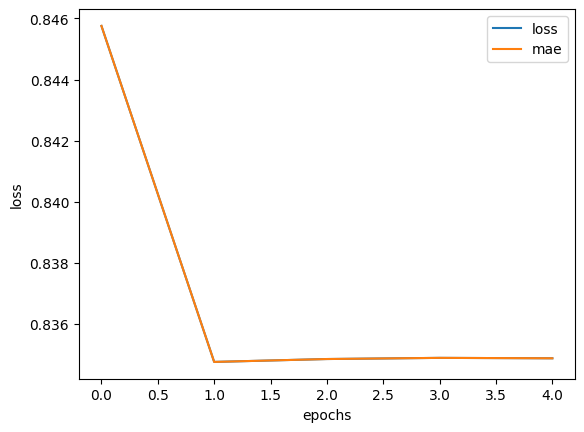

In [11]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [12]:
y_pred = model.predict(x_test_normalized)

3125/3125 [==============================] - 2s 700us/step


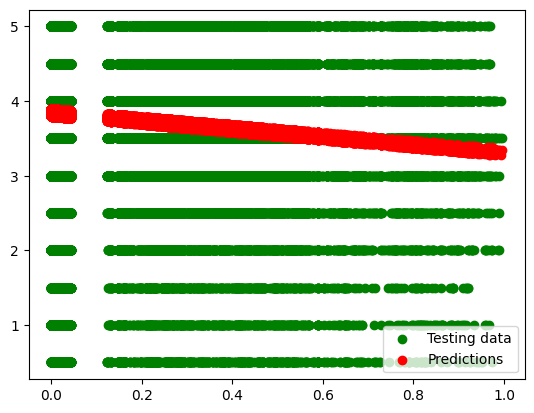

In [72]:
plt.scatter(x_test_normalized[:,1], y_test, c='g', label='Testing data')
plt.scatter(x_test_normalized[:,1], y_pred, c='r', label='Predictions')
plt.legend()